# Ch `03`: Concept `01`

## Linear regression

Import TensorFlow for the learning algorithm. We'll need NumPy to set up the initial data. And we'll use matplotlib to visualize our data.

In [3]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Define some constants used by the learning algorithm. There are called hyper-parameters.

In [4]:
learning_rate = 0.01
training_epochs = 100

Set up fake data that we will use to to find a best fit line

In [5]:
x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

Plot the raw data

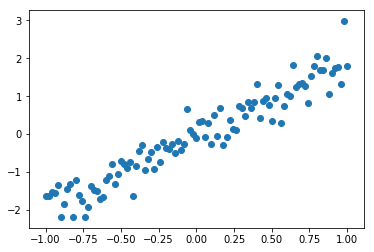

In [6]:
plt.scatter(x_train, y_train)

Set up the input and output nodes as placeholders since the value will be injected by `x_train` and `y_train`.

In [7]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

Define the model as `y = w'*x`

In [8]:
def model(X, w):
    return tf.multiply(X, w)

Set up the weights variable

In [9]:
w = tf.Variable(0.0, name="weights")

Instructions for updating:
Colocations handled automatically by placer.


Define the cost function as the mean squared error

In [10]:
y_model = model(X, w)
cost = tf.reduce_mean(tf.square(Y-y_model))

Define the operation that will be called on each iteration of the learning algorithm

In [11]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


Instructions for updating:
Use tf.cast instead.


Initialize all variables

In [12]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

Train on each (x, y) pair multiple times

In [13]:
for epoch in range(training_epochs):
    for (x, y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X: x, Y: y})

Fetch the value of the learned parameter

In [14]:
w_val = sess.run(w)

In [15]:
sess.close()

Visualize the best fit curve

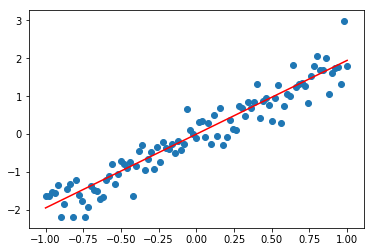

In [16]:
plt.scatter(x_train, y_train)
y_learned = x_train*w_val
plt.plot(x_train, y_learned, 'r')
plt.show()